In [7]:
import random
import math
import numpy as np
import copy
import matplotlib.pyplot as plt
import itertools

In [98]:
#Preprocess

INF = int(1e10)
n = 29

T = 2000 #Tempreture
ind = 200

edges = [[0 for i in range(n)] for j in range(n)]
gen = [] #Current generation of permutations

#Input
"""
file1 = open('Desktop/bayg29.tsp', 'r') 
Lines = file1.readlines() 
  
i = 0
for line in Lines: 
    tmp = line.split()
    for j in range(n-i-1):
        edges[i][j+i+1] = int(tmp[j])
        edges[j+i+1][i] = int(tmp[j])
    i=i+1
"""

cor = [[] for i in range(n)]
file1 = open('Desktop/bayg.tsp', 'r') 
Lines = file1.readlines()

for line in Lines:
    i, x, y = line.split()
    x, y = float(x), float(y)
    i = int(i)
    cor[i-1].append(x)
    cor[i-1].append(y)

#cor = cor[1:230]

for i in range(n):
    for j in range(n):
        edges[i][j] = int(((cor[i][0]-cor[j][0])**2 + (cor[i][1]-cor[j][1])**2)**(0.5))

print(cor)

[[1150.0, 1760.0], [630.0, 1660.0], [40.0, 2090.0], [750.0, 1100.0], [750.0, 2030.0], [1030.0, 2070.0], [1650.0, 650.0], [1490.0, 1630.0], [790.0, 2260.0], [710.0, 1310.0], [840.0, 550.0], [1170.0, 2300.0], [970.0, 1340.0], [510.0, 700.0], [750.0, 900.0], [1280.0, 1200.0], [230.0, 590.0], [460.0, 860.0], [1040.0, 950.0], [590.0, 1390.0], [830.0, 1770.0], [490.0, 500.0], [1840.0, 1240.0], [1260.0, 1500.0], [1280.0, 790.0], [490.0, 2130.0], [1460.0, 1420.0], [1260.0, 1910.0], [360.0, 1980.0]]


In [99]:
#functions

def fitness(a):
    #returns the fitness of the permutation a
    fit = int(0)
    for i in range(0, len(a)-1):
        fit = fit+edges[a[i]][a[i+1]]
    fit = fit+edges[a[len(a)-1]][a[0]] #back to the first node
    
    return fit

def randomPermutation():
    a = [i for i in range(n)]
    random.shuffle(a)
    return a

def neig(x):
    i = random.choice(range(0, n-1))
    j = random.choice(range(0, n))
    x[i], x[j] = x[j], x[i]
    return x

def prob(dif): #Handles the probabilty to move
    global T
    tmp = np.exp(-(dif/T))
    p = random.uniform(0, 1);
    if p <= tmp:
        return True
    return False

In [184]:
a = randomPermutation()
print(a)
history = []
T = 20000 #Tempreture
backT = T
ind = 70000
for i in range(ind):
    #T = ind/(i+1)
    #T = ind-i
    #T = ind/(1+1.5*(i))
    T = backT/(i+1)
    
    
    b = a[:]
    b = neig(b)
    if i%1000 == 0 and i//1000 < 21:
        #history.append(fitness(a))
        print(i//1000, fitness(a), a)
    
    if (fitness(b) < fitness(a)):
        a = b
        continue
        
    elif prob(abs(fitness(b)-fitness(a))) == True:
        a = b
print(fitness(a))

[11, 13, 16, 5, 18, 24, 6, 1, 14, 27, 8, 26, 25, 15, 0, 28, 17, 21, 22, 19, 2, 4, 20, 10, 12, 3, 23, 9, 7]
0 25641 [11, 13, 16, 5, 18, 24, 6, 1, 14, 27, 8, 26, 25, 15, 0, 28, 17, 21, 22, 19, 2, 4, 20, 10, 12, 3, 23, 9, 7]
1 10910 [13, 12, 15, 26, 27, 11, 5, 20, 0, 23, 7, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4, 8, 25, 28, 2, 17, 16, 21]
2 10733 [13, 12, 15, 23, 27, 11, 5, 20, 0, 7, 26, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4, 8, 25, 28, 2, 17, 16, 21]
3 10733 [13, 12, 15, 23, 27, 11, 5, 20, 0, 7, 26, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4, 8, 25, 28, 2, 17, 16, 21]
4 10733 [13, 12, 15, 23, 27, 11, 5, 20, 0, 7, 26, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4, 8, 25, 28, 2, 17, 16, 21]
5 10733 [13, 12, 15, 23, 27, 11, 5, 20, 0, 7, 26, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4, 8, 25, 28, 2, 17, 16, 21]
6 10733 [13, 12, 15, 23, 27, 11, 5, 20, 0, 7, 26, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4, 8, 25, 28, 2, 17, 16, 21]
7 10733 [13, 12, 15, 23, 27, 11, 5, 20, 0, 7, 26, 22, 6, 24, 18, 10, 14, 3, 9, 19, 1, 4,

In [173]:
print(fitness(a))
print(a)

9413
[22, 26, 7, 23, 15, 12, 0, 27, 4, 28, 2, 25, 8, 11, 5, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6]


In [ ]:
[17, 16, 21, 13, 0, 27, 7, 23, 15, 26, 22, 6, 24, 10, 14, 18, 12, 9, 20, 4, 5, 11, 8, 25, 2, 28, 1, 19, 3]
0 10902 [17, 16, 21, 13, 0, 27, 7, 23, 15, 26, 22, 6, 24, 10, 14, 18, 12, 9, 20, 4, 5, 11, 8, 25, 2, 28, 1, 19, 3]
1 10990 [22, 15, 26, 7, 23, 12, 0, 5, 2, 28, 25, 4, 8, 11, 27, 20, 1, 19, 9, 17, 13, 16, 21, 14, 3, 18, 10, 6, 24]
2 10120 [22, 7, 26, 23, 15, 12, 0, 27, 4, 28, 2, 25, 8, 11, 5, 20, 1, 19, 9, 17, 16, 21, 13, 14, 10, 3, 18, 24, 6]
3 9571 [22, 26, 7, 23, 15, 12, 0, 27, 4, 28, 2, 25, 8, 11, 5, 20, 1, 19, 9, 3, 14, 17, 13, 21, 16, 10, 18, 24, 6]

In [74]:
print(history[:20])

[]


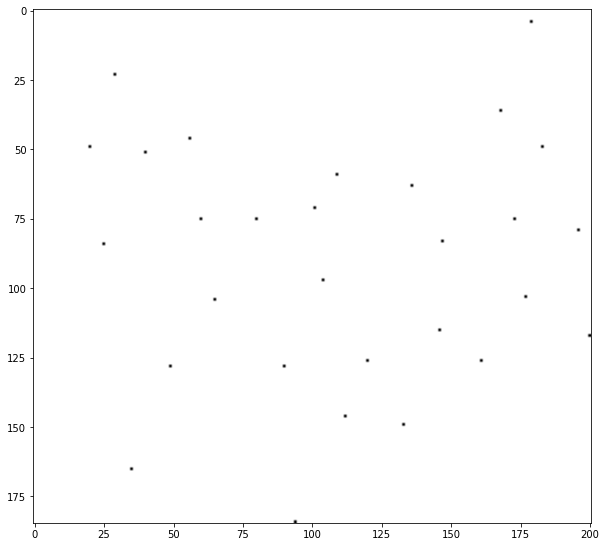

In [75]:
Map = [[255 for i in range(30, 231)] for j in range(0, 185)]

for c in cor:
    #print(int(c[0])//10,int(c[1])//10 -30 )
    Map[int(c[0])//10][int(c[1])//10 -30] = 0
    
plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(Map, cmap='gray')

drawing line between 13 [51, 40]  and  11 [117, 200]
drawing line between 16 [23, 29]  and  13 [51, 40]
drawing line between 5 [103, 177]  and  16 [23, 29]
drawing line between 18 [104, 65]  and  5 [103, 177]
drawing line between 24 [128, 49]  and  18 [104, 65]
drawing line between 6 [165, 35]  and  24 [128, 49]
drawing line between 1 [63, 136]  and  6 [165, 35]
drawing line between 14 [75, 60]  and  1 [63, 136]
drawing line between 27 [126, 161]  and  14 [75, 60]
drawing line between 8 [79, 196]  and  27 [126, 161]
drawing line between 26 [146, 112]  and  8 [79, 196]
drawing line between 25 [49, 183]  and  26 [146, 112]
drawing line between 15 [128, 90]  and  25 [49, 183]
drawing line between 0 [115, 146]  and  15 [128, 90]
drawing line between 28 [36, 168]  and  0 [115, 146]
drawing line between 17 [46, 56]  and  28 [36, 168]
drawing line between 21 [49, 20]  and  17 [46, 56]
drawing line between 22 [184, 94]  and  21 [49, 20]
drawing line between 19 [59, 109]  and  22 [184, 94]
draw

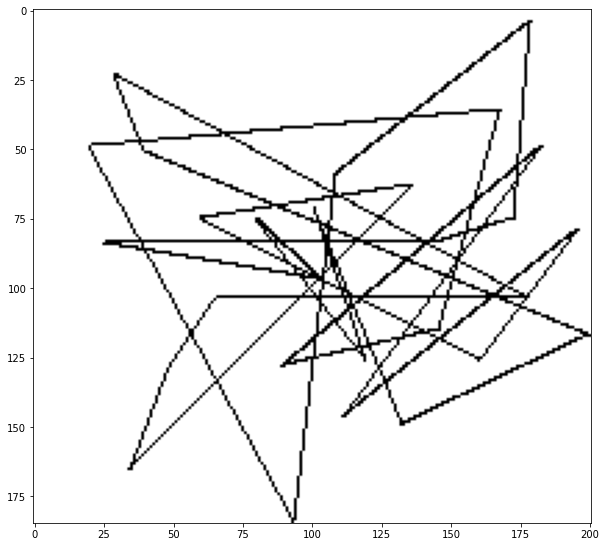

In [185]:
Map = [[255 for i in range(30, 231)] for j in range(0, 185)]
#veryBest = [2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23, 0, 27, 5, 11, 8, 25, 2]
a = [11, 13, 16, 5, 18, 24, 6, 1, 14, 27, 8, 26, 25, 15, 0, 28, 17, 21, 22, 19, 2, 4, 20, 10, 12, 3, 23, 9, 7]


veryBest = a.copy()
veryBest += [veryBest[0]]

for i in range(1):
    #for j in range(1, len(cl[i])):
    for j in range(1, n+1):
        #a = cl[i][j-1].copy()  #Draw Line
        #b = cl[i][j].copy()
        a = cor[veryBest[j]].copy()
        b = cor[veryBest[j-1]].copy()
        
        a[0] = int(a[0]//10)
        a[1] = int(a[1]//10) -30
        b[0] = int(b[0]//10)
        b[1] = int(b[1]//10) -30
        print("drawing line between", veryBest[j], a, " and ", veryBest[j-1], b)
        
        if abs(a[0]-b[0]) < 1:
            for helper in range (min(a[1], b[1]), max(a[1], b[1])):
                Map[a[0]][helper] = 70
            continue
        
        if a[0] > b[0]:
            a, b = b, a
        c = a.copy()
        while (c[0] < b[0]):
            helper = c[1]
            c[1] += (b[1]-a[1])/(b[0]-a[0])
            
            if helper < c[1]:
                counter = helper
                while (counter < c[1]):
                    Map[int(c[0])][int(counter)] = 70
                    counter += 1
                
            if helper > c[1]:
                counter = helper
                while (counter > c[1]):
                    Map[int(c[0])][int(counter)] = 70
                    counter -= 1
                    
            c[0] += 1
            Map[int(c[0])][int(c[1])] = 70

        
plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(Map, cmap='gray')
#print("The cost yet:", totalCost)